In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

In [30]:
data = pd.read_csv('insurance.csv')

In [32]:
# One-Hot encoding object columns
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], dtype=int, drop_first=True)

In [33]:
# Correlation between features and label
corr_matrix = data.corr()

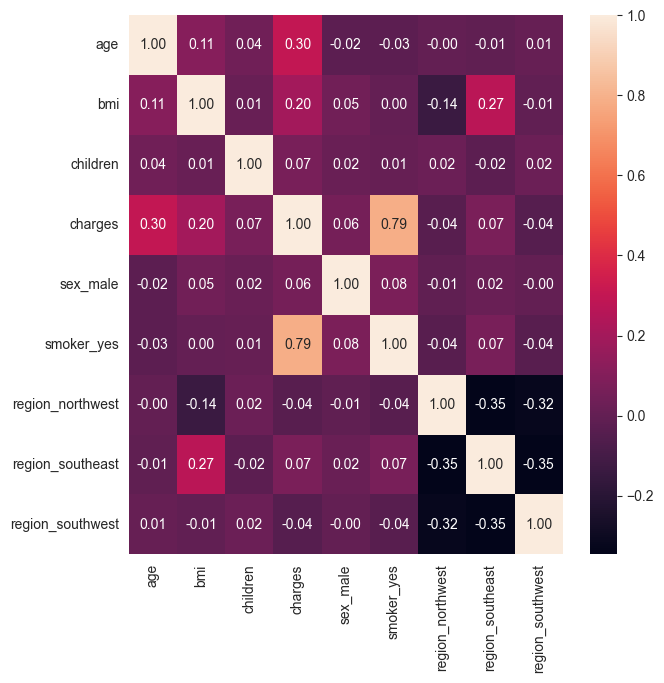

In [34]:
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

In [35]:
# Separating target from data
X = data.drop(columns=['charges'])
y = data['charges']

In [36]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
# Scaler for preprocessing data
scaler = StandardScaler()
X_columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_columns)

In [38]:
# Split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [39]:
# # Initialize the model
model = GradientBoostingRegressor()

In [40]:
# # Fit data with model
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [41]:
# # Model prediction
y_pred = model.predict(X_test)

In [42]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [43]:
print(f'{mse:.2f}')
print(f'{rmse:.2f}')
print(f'{r2:.2f}')

19839446.27
4454.15
0.87
